In [1]:
# ### una tecnica robusta que no tenga dependencia de la separacion de datos
import pandas as pd
import numpy as np
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/MachineLearning_Platzi')

## Cross Validation

In [2]:
X = pd.read_csv('df_intermediate.csv')
### eliminar columnas duplicadas
X = X.drop_duplicates(X.columns)
y = X['worldwide_gross']
X = X.drop(['worldwide_gross','usa_gross','gross'], axis=1)
X.shape

(3921, 8)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)
x_train.head()

,production_budget,opening_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
3696,1000000.0,346999.0,2001.0,1.85,97.0,1173.0,1000000.0,6.7
2342,17000000.0,13350299.0,2009.0,2.35,132.0,6317.0,17000000.0,6.7
346,100000000.0,29702959.0,2000.0,2.35,130.0,12890.0,100000000.0,6.6
1826,25000000.0,16521468.0,2003.0,2.35,101.0,6867.0,30000000.0,5.8
1840,27000000.0,5582079.0,1996.0,2.35,117.0,16937.0,27000000.0,6.9


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
scores = cross_val_score(Lasso(), X,y, cv = 5, scoring = 'r2')
scores

array([ 0.62964773,  0.53852601,  0.41737271,  0.25663736, -0.40949347])

In [5]:
scores.mean()

0.28653806707440843

In [6]:
### podemos observar que existe un score alto cuando solo se utiliza un simple train_test_split
### ya que el cross_validation es una tecnica robusta que toma en cuenta todo el set de datos para realizar el entrenamiento y testeo
### y permite calcular una metrica confiable que toma el promedio de los resultados de cada modelo
Lasso().fit(x_train, y_train).score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1505118622385766e+18, tolerance: 7828332006089374.0
  positive)


0.6967516086249042

In [7]:
### modelo complejos vs modelos simple depende de la complejidad del modelo
### el sesgo alto, esta ligado al underfitting
### la varianza alta, esta ligada al overfitting
### todo esto con el set de entrenamiento

In [8]:
# !pip install --upgrade scikit-learn

In [9]:
from sklearn.model_selection import cross_validate
results = cross_validate(Lasso(),X, y,return_train_score = True, cv = 5)
results

{'fit_time': array([0.01400232, 0.00620651, 0.00720525, 0.00695682, 0.00643563]),
 'score_time': array([0.00311351, 0.00282884, 0.00275779, 0.00288129, 0.00279999]),
 'test_score': array([ 0.62964773,  0.53852601,  0.41737271,  0.25663736, -0.40949347]),
 'train_score': array([0.52885197, 0.76240549, 0.75884974, 0.75747934, 0.74290652])}

In [10]:
train_scores = results['train_score']
test_scores = results['test_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7100986108511236
0.28653806707440843


In [11]:
### nuestro modelo tiene un sesgo con el set entrenamiento
### nos encontramos en underfitting

### Validation Curves y Learning Curves

In [14]:
from sklearn.neighbors import KNeighborsRegressor
cross_validate(KNeighborsRegressor(),X, y,return_train_score = True, cv = 5)

{'fit_time': array([0.01340032, 0.00597453, 0.00535464, 0.00529528, 0.0052762 ]),
 'score_time': array([0.0070715 , 0.0065577 , 0.00575209, 0.00576663, 0.00474811]),
 'test_score': array([0.17960255, 0.17796001, 0.12789167, 0.08891128, 0.18498709]),
 'train_score': array([0.588348  , 0.79763031, 0.7947667 , 0.79242553, 0.77552365])}

In [15]:
cross_validate(KNeighborsRegressor(n_neighbors=10),X, y,return_train_score = True, cv = 5)

{'fit_time': array([0.01070118, 0.00530267, 0.00520754, 0.00532126, 0.00505018]),
 'score_time': array([0.00636935, 0.00669575, 0.00684571, 0.00684977, 0.00508523]),
 'test_score': array([ 0.09384327,  0.28722965,  0.21067161, -0.11557268,  0.23328006]),
 'train_score': array([0.52304225, 0.7683745 , 0.76647174, 0.75861668, 0.74366348])}

In [ ]:
### aqui bajo un poco tanto para el score de entrenamiento y de prueba

In [16]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [17]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             X,
                                             y,
                                             param_name = 'n_neighbors',
                                             param_range = n,
                                             cv = 5
                                             )

In [19]:
np.mean(train_scores,axis =1)

array([0.85899542, 0.76655174, 0.73989698, 0.72201489, 0.71203373,
       0.70498569, 0.69823824, 0.69046271, 0.6841553 , 0.67777901,
       0.67506246, 0.67064375, 0.66774784, 0.66434159, 0.6627631 ,
       0.65999636, 0.65772145, 0.65554344, 0.65352401, 0.65100442,
       0.65058572, 0.64846771, 0.64705604, 0.64503711])

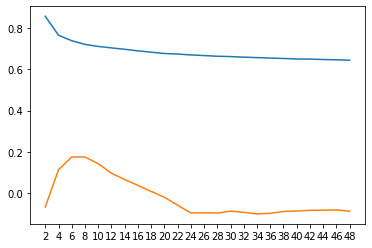

In [21]:
import matplotlib.pyplot as plt
plt.plot(np.mean(train_scores,axis =1))
plt.plot(np.mean(test_scores,axis =1))
plt.xticks(np.arange(24),n);

In [ ]:
### podemos ver que todavia nos escontramos con un problema de overfitting . Alta varianza con el set de entrenamiento y 
### bajo sesgo con el set de testeo 

In [23]:
### para saber como se comporta la curva de aprendizaje cuando se le agregan mas datos de entrenamiento
from sklearn.model_selection import learning_curve
lc = learning_curve(KNeighborsRegressor(n_neighbors=6), X, y, cv=5)
samples, train, test = lc[0],lc[1],lc[2]

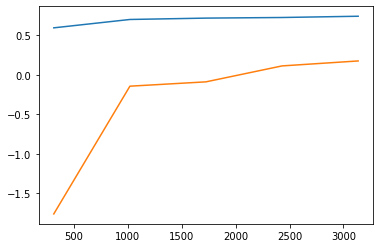

In [27]:
### visualizar la curva de aprendizaje
plt.plot(samples, np.mean(train, axis=1))
plt.plot(samples, np.mean(test, axis=1))

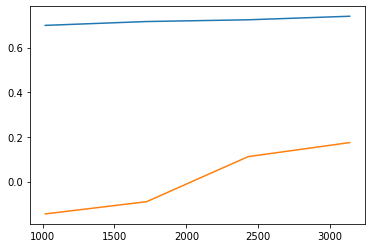

In [26]:
### hacer un zoom para tener una mejor vista de lo que ocurres con la curva de aprendizaje
plt.plot(samples[1:], np.mean(train, axis=1)[1:])
plt.plot(samples[1:], np.mean(test, axis=1)[1:])

In [ ]:
### aqui vemos que el test_score esta creciendo y no muestra una tendencia a la asintota por lo que lo que se haria en conseguir 
### mas datos para el entrenamiento, pero muchas veces es complicado encontrar mas datos

In [ ]:
### kneighbors cae mucho en la maldicion de la dimensionalidad, por lo que a mayor features que tenga el set de datos
### va a necesitar mas datos para el entrenamiento

## Recomendacion General

In [ ]:
### Varianza Alta con el set de entrenamiento:
## conseguir mas ejemplos
## reducir cantidad de features
## aumentar coeficiente de regularizacion

### Bias alto/ Sesgo Alto con el set de entrenamiento:
## mas features para representar mejor los datos
## modelo más complejo

### Mas resultado general
## probar varios modelo de otra familia de algoritmos, ya que modelo muy complejos suelen presentar alta varianza
## y modelos simples alto sesgo